## Build a machine learning model to create group of mall customers based on their annual income and spending score for a given dataset

### Data Preprocessing 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
os.chdir('/home/admin1/PycharmProjects/Clustering datasets/')

# reading dataset from csv file & storing it as pandas dataframe
mall_data = pd.read_csv('Mall_Customers.csv')
mall_data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


#### Checking for null values

In [2]:
mall_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Genre                     200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [3]:
# defining feature columns
features = ['Annual Income (k$)','Spending Score (1-100)']

In [4]:
mall_data.loc[:,features].describe()

,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000
mean,60.560000,50.200000
std,26.264721,25.823522
min,15.000000,1.000000
25%,41.500000,34.750000
50%,61.500000,50.000000
75%,78.000000,73.000000
max,137.000000,99.000000


#### Observing distribution of data 

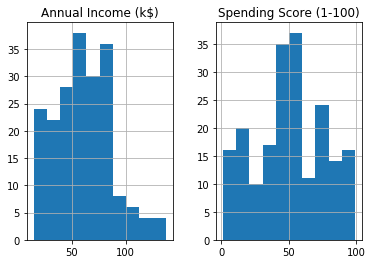

In [5]:
mall_data.loc[:,features].hist()
plt.show()

#### Creating feature matrix

In [6]:
x_values= mall_data.loc[:,features].values

### Finding optimal number of clusters using elbow method

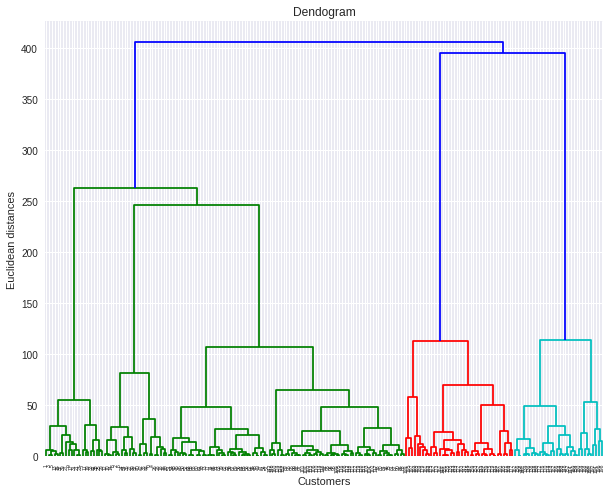

In [7]:
import scipy.cluster.hierarchy as sch

plt.style.use('seaborn')
plt.figure(figsize=(10,8))
dendogram = sch.dendrogram(sch.linkage(x_values, method='ward'))
plt.title('Dendogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

#### Optimal number of clusters is 5 

### Building Hierarchical clustering model

In [8]:
from sklearn.cluster import AgglomerativeClustering

total_clusters = 5
agglo_clustering = AgglomerativeClustering(n_clusters=total_clusters, affinity='euclidean', linkage='ward')
predicted_clusters = agglo_clustering.fit_predict(x_values)

### Displaying created clusters

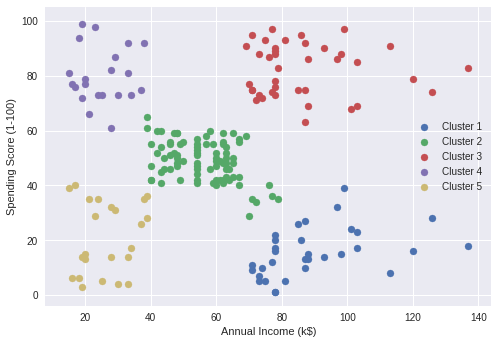

In [9]:
# plotting different clusters & their centres
for num in range(total_clusters):
    plt.scatter(x_values[predicted_clusters==num,0], x_values[predicted_clusters==num,1], label='Cluster '+str(num + 1))

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

#### Total number of customers in each cluster

In [10]:
for num in range(total_clusters):
    print(f'Number of customers in Cluster {num + 1}: {len(predicted_clusters[predicted_clusters==num])}')

Number of customers in Cluster 1: 32
Number of customers in Cluster 2: 85
Number of customers in Cluster 3: 39
Number of customers in Cluster 4: 21
Number of customers in Cluster 5: 23
